# RETO 2 - INTEGRANTES 
- **Alex Segovia**
- **Dennisse Guartan**
- **Luis Yépez**
- **Jeniffer Urquiza**
  
# Análisis de Texto en Python: Bag of Words
## Objetivos de Aprendizaje
- Aprender cómo convertir datos de texto en números mediante el enfoque de Bag of Words.
- Entender el algoritmo TF-IDF y cómo complementa la representación de Bag of Words
- Implementar Bag of Words y TF-IDF utilizando el paquete sklearn y comprender la configuración de sus parámetros.
- Usar las representaciones numéricas de los datos de texto para realizar análisis de sentimientos.

## Secciones 
**1. Análisis Exploratorio de Datos**

**2. Preprocesamiento**

**3. La Representación de Bolsa de Palabras**

**4. Frecuencia de Términos-Frecuencia  Inversa de Documento**

**5. Clasificación de Sentimientos Usando la Representación TF-IDF**

En la parte anterior, aprendimos cómo realizar el preprocesamiento de texto. Sin embargo, no fuimos más allá de los datos de texto en sí. Si estamos interesados en hacer cualquier tipo de análisis computacional sobre los datos de texto, aún necesitamos enfoques para convertir el texto en una representación numérica.

En la Parte 2 de nuestra serie de talleres, exploraremos una de las formas más sencillas de generar una representación numérica a partir del texto: la bolsa de palabras (BoW). Implementaremos la representación BoW para transformar nuestros datos de tweets de aerolíneas y luego construiremos un clasificador para explorar lo que nos dice sobre el sentimiento de los tweets. En el corazón del enfoque de bolsa de palabras yace la suposición de que la frecuencia de tokens específicos es informativa sobre la semántica y el sentimiento subyacente en el texto.

Haremos un uso intensivo del paquete **scikit-learn** para hacerlo, ya que proporciona un buen marco para construir la representación numérica.



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jeniffer/airline_tweets.csv


In [2]:
#Primero se debe instalar el paquete scikit-learn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Se procede a instalar los paquetes de PNL (Procesamiento de Lenguaje Natural)
%pip install NLTK
%pip install spaCy
!python -m spacy download en_core_web_sm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/usr/lib/python3.10/socket.py", line 955, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno -3] Temporary failure in name resolution

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.

In [4]:
#Importar otros paquetes 
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
%matplotlib inline


# Análisis Exploratorio de Datos
Antes de realizar cualquier preprocesamiento o modelado, siempre debemos realizar un análisis exploratorio de datos para familiarizarnos con los datos.

In [5]:
# Se van a leer los datos 
tweets_path = '/kaggle/input/jeniffer/airline_tweets.csv'
tweets = pd.read_csv(tweets_path, sep=',')

In [6]:
# Mostrar las primeras filas
tweets.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Como recordatorio, cada fila en este DataFrame corresponde a un tweet. Las siguientes columnas son de principal interés para nosotros. Hay otras columnas que contienen metadatos del tweet, como el autor del tweet, cuándo fue creado, la zona horaria del usuario, entre otros, que dejaremos de lado por ahora.

- text (str): texto del tweet
- airline_sentiment (str): el sentimiento del tweet, etiquetado como "neutral", "positivo" o "negativo"
- airline (str): la aerolínea de la que se habla en el tweet.
- retweet count (int): cuántas veces se ha retwitteado el tweet.

Para prepararnos para la clasificación de sentimientos, vamos a dividir el conjunto de datos y centrarnos en los tweets "positivos" y "negativos" por ahora.

In [7]:
tweets = tweets[tweets['airline_sentiment'] != 'neutral'].reset_index(drop=True)

In [8]:
#Se van a revisar algunos tweets de la siguiente manera 
for idx in range(5):
    print(tweets['text'].iloc[idx])
    

@VirginAmerica plus you've added commercials to the experience... tacky.
@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
@VirginAmerica and it's a really big bad thing about it
@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA
@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)


Ya podemos ver que algunos de estos tweets contienen un sentimiento negativo. ¿Cómo podemos saber que este es el caso?

A continuación, echemos un vistazo a la distribución de las etiquetas de sentimiento en este conjunto de datos.

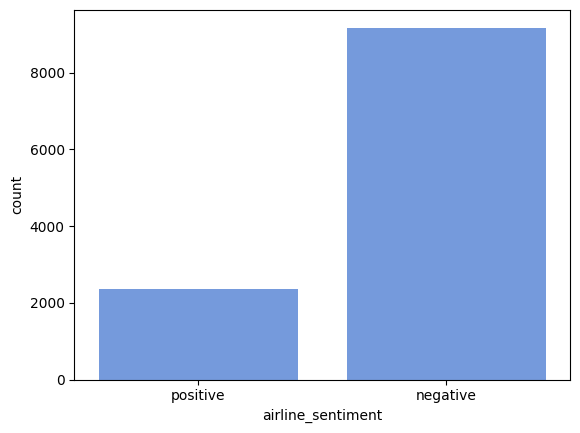

In [9]:
#  Se crea un gráfico de barras mostrando el conteo de los sentimientos de los tweets
sns.countplot(data=tweets,
              x='airline_sentiment', 
              color='cornflowerblue',
              order=['positive', 'negative']);

Parece que la mayoría de los tuits de este conjunto de datos expresan un sentimiento negativo.

Veamos qué se retuitea con más frecuencia:

In [10]:
# Obtener el promedio de la cantidad de retweets para cada sentimiento
tweets.groupby('airline_sentiment')['retweet_count'].mean()


airline_sentiment
negative    0.093375
positive    0.069403
Name: retweet_count, dtype: float64

¡Los tweets negativos son claramente retwitteados más a menudo que los positivos!

Veamos qué aerolínea recibe la mayor cantidad de tweets negativos:

In [11]:
# Obtener la proporción de tweets negativos por aerolínea
proporciones = tweets.groupby(['airline', 'airline_sentiment']).size() / tweets.groupby('airline').size()
proporciones.unstack().sort_values('negative', ascending=False)

airline_sentiment,negative,positive
airline,,
US Airways,0.893760,0.106240
American,0.853659,0.146341
United,0.842560,0.157440
Southwest,0.675399,0.324601
Delta,0.637091,0.362909
Virgin America,0.543544,0.456456


Parece que la gente está más insatisfecha con US Airways, seguida por American Airlines, ¡ambas con más del 85% de tweets negativos!

Se podrían hacer muchos descubrimientos interesantes si deseas explorar más sobre los datos. Ahora volvamos a nuestra tarea de análisis de sentimientos. Antes de eso, necesitamos preprocesar los datos de texto para que estén en un formato estándar.

# Preprocesamiento
Pasamos gran parte de la Parte 1 aprendiendo cómo preprocesar datos. ¡Vamos a aplicar lo que aprendimos! Al mirar algunos de los tweets anteriores, podemos ver que, aunque están bastante bien, podemos realizar un procesamiento adicional en ellos.

En nuestra pipeline, omitiremos el proceso de tokenización ya que lo realizaremos en un paso posterior.



# Desafío 1: Aplicar una Pipeline de Limpieza de Texto
Escribe una función llamada preprocess que realice los siguientes pasos en una entrada de texto:

- **Paso 1**: Convierte el texto a minúsculas.
- **Paso 2**: Reemplaza los siguientes patrones con marcadores de posición:
  
- - URLs → **URL**

- - Dígitos → **DIGIT**

- - Hashtags → **HASHTAG**

- - Menciones de usuarios (handles de Twitter) → **USER**

- Paso 3: Elimina los espacios en blanco adicionales.

## Pistas:
- **Paso 1**: Recuerda que puedes usar el método **.lower()** para convertir el texto a minúsculas.

- **Paso 2**: Se ha integrado el paso 2 en una función llamada **placeholder**. Ejecuta la celda de abajo para importarla a tu notebook y podrás usarla como cualquier otra función.

- **Paso 3**: Se proporciona el patrón de expresión regular (regex) para identificar los caracteres de espacio en blanco, así como el reemplazo adecuado para extraer los espacios en blanco.

Ejecuta tu función **preprocess** en **example_tweet** (en las siguientes tres celdas) para comprobar si funciona. Si lo hace, aplícala a toda la columna de texto en el DataFrame de tweets.

In [12]:
#Como no puedo acceder al archivo utils.py realizó los pagos aquí 
import re

url_pattern = r'(http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])'
digit_pattern = '\d+'
hashtag_pattern = r'(?:^|\s)[＃#]{1}(\w+)'
user_pattern = r'@(\w+)'

def placeholder(text):
    # Replace URLs
    url_pattern = r'(http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])'
    url_repl = ' URL '
    text = re.sub(url_pattern, url_repl, text)
    # Replace digits
    digit_pattern = '\d+'
    digit_repl = ' DIGIT '
    text = re.sub(digit_pattern, digit_repl, text)
    # Replace hashtags
    hashtag_pattern = r'(?:^|\s)[＃#]{1}(\w+)'
    hashtag_repl = ' HASHTAG '
    text = re.sub(hashtag_pattern, hashtag_repl, text)
    # Replace users
    user_pattern = r'@(\w+)'
    user_repl = ' USER '
    text = re.sub(user_pattern, user_repl, text)
    return text
    

In [13]:
blankspace_pattern = r'\s+'  # Patrón para los espacios en blanco
blankspace_repl = ' '  # Reemplazo de espacios en blanco

def preprocess(text):
    '''Crea una pipeline de preprocesamiento que limpia los datos del tweet.'''
    
    # Paso 1: Convertir el texto a minúsculas
    text = text.lower()

    # Paso 2: Reemplazar patrones con los marcadores de posición
    text = re.sub(r'http\S+', 'URL', text)  # Reemplazar URLs por 'URL'
    text = re.sub(r'\d+', 'DIGIT', text)    # Reemplazar dígitos por 'DIGIT'
    text = re.sub(r'#\S+', 'HASHTAG', text) # Reemplazar hashtags por 'HASHTAG'
    text = re.sub(r'@\S+', 'USER', text)    # Reemplazar handles de usuario por 'USER'

    # Paso 3: Eliminar espacios extra
    text = re.sub(r'\s+', ' ', text).strip()  # Eliminar espacios extra

    return text

In [14]:
example_tweet = 'lol @justinbeiber and @BillGates are like soo 200000 #yesterday #amiright saw it on https://twitter.com #yolo'

# Muestra tweet de ejemplo
print(example_tweet)
print(f"{'='*70}")

# Imprimir el tweet preprocesado
print(preprocess(example_tweet))

lol @justinbeiber and @BillGates are like soo 200000 #yesterday #amiright saw it on https://twitter.com #yolo
lol USER and USER are like soo DIGIT HASHTAG HASHTAG saw it on URL HASHTAG


In [15]:
# Aplicar la función a la columna de texto y asignar los tweets preprocesados a una nueva columna
tweets['text_processed'] = tweets['text'].apply(lambda x: preprocess(x))
tweets['text_processed'].head()

0    USER plus you've added commercials to the expe...
1    USER it's really aggressive to blast obnoxious...
2        USER and it's a really big bad thing about it
3    USER seriously would pay $DIGIT a flight for s...
4    USER yes, nearly every time i fly vx this “ear...
Name: text_processed, dtype: object

# La Representación de Bag-of-Words (BoW)
La idea de bag-of-words (BoW), como su nombre lo sugiere, es bastante intuitiva: tomamos un documento y lo "metemos en una bolsa". El acto de "meter" el documento en una bolsa ignora la posición relativa de las palabras, por lo que lo que está "en la bolsa" es esencialmente "un conjunto desordenado de palabras" (Jurafsky & Martin, 2024). Como resultado, obtenemos una lista de palabras únicas y la frecuencia con la que aparece cada una de ellas.

## Ejemplo:
Por ejemplo, como se muestra en la siguiente ilustración, la palabra "coffee" aparece dos veces en el documento.

Con una representación bag-of-words, nos basamos principalmente en la frecuencia de palabras y no tanto en el orden de las palabras.

# BoW y Análisis de Sentimiento:
En el contexto del análisis de sentimiento, el sentimiento de un tweet se transmite más fuertemente por palabras específicas. Por ejemplo, si un tweet contiene la palabra "happy", probablemente transmita un sentimiento positivo. Sin embargo, esto no siempre es así (por ejemplo, "not happy" denota un sentimiento contrario). Cuando estas palabras aparecen con más frecuencia, probablemente transmitirán más fuertemente el sentimiento subyacente.

# Matriz de Términos de Documento
Ahora vamos a implementar la idea de bag-of-words. Antes de profundizar más, retrocedamos un momento. En la práctica, el análisis de texto a menudo implica manejar muchos documentos; a partir de ahora, utilizamos el término documento para representar un fragmento de texto sobre el cual realizamos el análisis. Podría ser una frase, una oración, un tweet o cualquier otro texto; mientras pueda ser representado por una cadena, la longitud no importa realmente.

Imaginemos que tenemos cuatro documentos (es decir, las cuatro frases mostradas anteriormente) y los metemos todos en la bolsa. En lugar de una lista de frecuencias de palabras, esperaríamos una matriz de términos de documento (DTM) como resultado. En una DTM, la lista de palabras es el vocabulario (V) que contiene todas las palabras únicas que ocurren a través de los documentos. Para cada documento (D), contamos la cantidad de veces que aparece cada palabra en el vocabulario y luego colocamos ese número en la matriz. En otras palabras, la DTM que vamos a construir es una matriz, donde cada fila corresponde a un documento y cada columna corresponde a un token (o "término").

Los tokens únicos en este conjunto de documentos, ordenados alfabéticamente, forman las columnas. Para cada documento, marcamos la ocurrencia de cada palabra presente en el documento. La representación numérica de cada documento es una fila en la matriz. Por ejemplo, el primer documento, "the coffee roaster", tiene la representación numérica.

Tenga en cuenta que la columna de índice izquierda ahora muestra estos documentos como texto, pero normalmente simplemente asignaríamos un índice a cada uno de ellos.

Para crear una DTM, usaremos **CountVectorizer** del paquete **sklearn.**

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
# Un ejemplo de juguete que contiene cuatro documentos
test = ['the coffee roaster',
        'light roast',
        'iced americano',
        'coffee time']

El primer paso es inicializar un objeto CountVectorizer. Dentro de los paréntesis, podemos especificar configuraciones de parámetros si lo deseamos. Vamos a ver la documentación y ver qué opciones están disponibles.
Por ahora, podemos dejarlo en blanco para usar la configuración predeterminada.

In [18]:
# Crear un objeto CountVectorizer
vectorizer = CountVectorizer()

El segundo paso es ajustar este objeto **CountVectorizer** a los datos, lo que significa crear un vocabulario de tokens a partir del conjunto de documentos. En tercer lugar, transformamos nuestros datos de acuerdo con el objeto **CountVectorizer** "ajustado", lo que significa tomar cada uno de los documentos y contar las ocurrencias de los tokens según el vocabulario establecido durante el paso de "ajuste".

Puede sonar un poco complejo, pero los pasos 2 y 3 se pueden realizar de una sola vez usando la función **fit_transform.**

In [19]:
# Ajusta y transforma para crear una DTM
test_count = vectorizer.fit_transform(test)

test_count


<4x8 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

Aparentemente, tenemos una "matriz dispersa", una matriz que contiene muchos ceros. Esto tiene sentido. Para cada documento, hay palabras que no ocurren en absoluto, y estas se cuentan como cero en la matriz de términos de documento (DTM). Esta matriz dispersa se guarda en un formato de "Fila Comprimida Dispersa" (Compressed Sparse Row), un formato que ahorra memoria diseñado para manejar matrices dispersas.

Vamos a convertirla en una matriz densa, donde esos ceros probablemente estarán representados, al igual que en un arreglo numpy.

In [20]:
# Convertir DTM a una matriz densa
test_count.todense()

matrix([[0, 1, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 1]])

Esta es la matriz DTM. La matriz es la misma que la que se mostró anteriormente. Para hacerla más fácil de leer, vamos a convertirla a un DataFrame. Los nombres de las columnas deben ser los tokens en el vocabulario, que podemos acceder con la función *get_feature_names_out()*.

In [21]:
# Recuperar el vocabulario
vectorizer.get_feature_names_out()

array(['americano', 'coffee', 'iced', 'light', 'roast', 'roaster', 'the',
       'time'], dtype=object)

In [22]:
# Crear un DataFrame de la DTM
test_dtm = pd.DataFrame(data=test_count.todense(),
                        columns=vectorizer.get_feature_names_out())

La DTM de nuestros datos de ejemplo ahora está en un **DataFrame**. El índice de **test_dtm** corresponde a la posición de cada documento en la lista **test**.

In [23]:
test_dtm

,americano,coffee,iced,light,roast,roaster,the,time
0,0,1,0,0,0,1,1,0
1,0,0,0,1,1,0,0,0
2,1,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,1


# DTM para Tweets
Comenzaremos inicializando un objeto **CountVectorizer**. En la siguiente celda, hemos incluido algunos parámetros que las personas suelen ajustar. Estos parámetros están actualmente configurados con sus valores predeterminados.

Cuando construimos una **DTM**, el valor predeterminado es convertir el texto de entrada a minúsculas. Si no se proporciona el parámetro stop_words, el valor predeterminado es mantener las palabras vacías (stop words). Los siguientes tres parámetros se usan para controlar el tamaño del vocabulario, los cuales discutiremos más a fondo en un momento.

In [24]:
# Crear un objeto CountVectorizer
vectorizer = CountVectorizer(lowercase=True,
                             stop_words=None,
                             min_df=1,
                             max_df=1.0, 
                             max_features=None)

In [25]:
# Fit y transformar para crear DTM
counts = vectorizer.fit_transform(tweets['text_processed'])

In [26]:
# No ejecutar si tienes memoria limitada - esto incluye DataHub y Binder
np.array(counts.todense())

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
# Extraer tokens
tokens = vectorizer.get_feature_names_out()

In [28]:
# Crear DTM
first_dtm = pd.DataFrame(data=counts.todense(),
                         index=tweets.index,
                         columns=tokens)

# Imprimir la forma del DTM
print(first_dtm.shape)

(11541, 8857)


**Si dejamos el CountVectorizer con la configuración predeterminada, el tamaño del vocabulario de los datos de los tweets es 8751.**

In [29]:
first_dtm.head()


,_exact_,aa,aaaand,aadigit,aadigitso,aadv,aadvantage,aal,aaldigit,aaron,...,zdigit,zero,zig,zip,zippers,zone,zones,zoom,zukes,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


La mayoría de los tokens tienen cero ocurrencias, al menos en los primeros cinco tweets.

Vamos a echar un vistazo más de cerca al DTM

In [30]:
# Tokens más frecuentes
first_dtm.sum().sort_values(ascending=False).head(10)

user       12879
to          6986
digit       5198
the         5085
you         3635
for         3384
flight      3315
and         3275
on          3142
hashtag     2835
dtype: int64

In [31]:
# Tokens menos frecuentes
first_dtm.sum().sort_values(ascending=True).head(10)

_exact_    1
sardine    1
sarita     1
gin        1
gills      1
giggled    1
gig        1
gist       1
gifts      1
gif        1
dtype: int64

No es sorprendente ver que **'user'** y **'digit'** estén entre los tokens más frecuentes, ya que reemplazamos cada uno idiosincrático con estos marcadores de posición. El resto de los tokens más frecuentes son en su mayoría palabras vacías (stop words).

Tal vez un patrón más interesante sea buscar cuál token aparece más en un tweet dado:

In [32]:
counts = pd.DataFrame()

# Recuperar el índice del tweet donde un token aparece con mayor frecuencia
counts['token'] = first_dtm.idxmax(axis=1)

# Recuperar el número de ocurrencias
counts['number'] = first_dtm.max(axis=1)

# Filtrar los marcadores de posición
counts[(counts['token']!='digit')
       & (counts['token']!='hashtag')
       & (counts['token']!='user')].sort_values('number', ascending=False).head(10)

,token,number
5741,digita,6
918,worst,6
3127,lt,6
557,to,5
11007,to,5
5005,to,5
8134,to,5
8148,the,5
10572,to,5
355,to,5


Parece que entre todos los tweets, como máximo, un token aparece seis veces, y es ya sea la palabra 'It' o la palabra 'worst.'

Volvamos a nuestro dataframe de tweets y ubiquemos el tweet número 918.

In [33]:
# Recuperar el tweet número 918: "worst"
tweets.iloc[918]['text']

"@united is the worst. Worst reservation policies. Worst costumer service. Worst worst worst. Congrats, @Delta you're not that bad!"

Personalizar el CountVectorizer
Hasta ahora, siempre hemos usado la configuración de parámetros predeterminada para crear nuestros DTM, pero en muchos casos podemos querer personalizar el objeto CountVectorizer. El propósito de hacerlo es filtrar aún más los tokens innecesarios. En el ejemplo a continuación, ajustamos los siguientes parámetros:

- stop_words = 'english': ignorar las palabras vacías en inglés
- min_df = 2: ignorar palabras que no ocurren al menos dos veces
- max_df = 0.95: ignorar palabras si aparecen en más del 95% de los documentos

🔔 Pregunta: ¡Pausamos un minuto para discutir si parece razonable establecer estos parámetros! ¿Qué piensas?

A menudo, no estamos interesados en palabras cuyas frecuencias sean demasiado bajas o demasiado altas, por lo que usamos min_df y max_df para filtrarlas. Alternativamente, podemos definir el tamaño de nuestro vocabulario configurando max_features. En otras palabras, le decimos a CountVectorizer que solo considere los tokens más frecuentes al construir el DTM.

In [34]:
# Personalizar la configuración de parámetros
vectorizer = CountVectorizer(lowercase=True,
                             stop_words='english',
                             min_df=2,
                             max_df=0.95,
                             max_features=None)

In [35]:
# Ajustar, transformar y obtener tokens
counts = vectorizer.fit_transform(tweets['text_processed'])
tokens = vectorizer.get_feature_names_out()

# Crear el segundo DTM
second_dtm = pd.DataFrame(data=counts.todense(),
                          index=tweets.index,
                          columns=tokens)

In [36]:
print(first_dtm.shape)
print(second_dtm.shape)

(11541, 8857)
(11541, 4511)


In [37]:
second_dtm.head()

,aa,aadigit,aadv,aadvantage,abandoned,abc,ability,able,aboard,abq,...,yummy,yup,yvonne,yvr,yyj,yyz,zero,zone,zoom,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
second_dtm.sum().sort_values(ascending=False).head(10)

digit        5198
flight       3315
hashtag      2835
cancelled     956
thanks        921
service       910
just          801
customer      726
time          695
help          686
dtype: int64

🥊 **Desafío 2: Lematizar la Entrada de Texto**
Recuerda de la Parte 1 que introdujimos el uso de spaCy para realizar la lematización, es decir, para "recuperar" la forma base de una palabra. Este proceso reducirá el tamaño del vocabulario al mantener las variaciones de palabras al mínimo—un vocabulario más pequeño puede ayudar a mejorar el rendimiento del modelo en la clasificación de sentimientos.

Ahora implementemos la lematización en nuestros datos de tweets y usemos el texto lematizado para crear un tercer DTM.

Completa la función lemmatize_text. Requiere una entrada de texto y devuelve los lemas de todos los tokens.

Aquí hay algunas pistas para guiarte a través de este desafío:

Paso 1: inicializar una lista para contener los lemas
Paso 2: aplicar el pipeline de nlp al texto de entrada
Paso 3: iterar sobre los tokens en el texto procesado y recuperar el lema del token
PISTA: la lematización es una de las anotaciones lingüísticas que el pipeline de nlp hace automáticamente por nosotros. Podemos usar token.lemma_ para acceder a la anotación.

In [39]:
# Importar spaCy
import spacy
nlp = spacy.load('en_core_web_sm')

In [40]:
# Crear una función para lematizar texto
def lemmatize_text(text):
    '''Lematizar el texto de entrada con anotaciones de spaCy.'''

    # Paso 1: Inicializar una lista vacía para almacenar los lemas
    lemma = []

    # Paso 2: Aplicar el pipeline de nlp al texto de entrada
    doc = nlp(text)

    # Paso 3: Iterar sobre los tokens en el texto para obtener el lema del token
    for token in doc:
        lemma.append(token.lemma_)  # Añadir el lema de cada token

    # Paso 4: Unir los lemas en una sola cadena
    text_lemma = ' '.join(lemma)

    return text_lemma

¡Apliquemos la función al siguiente tweet de ejemplo primero!

In [41]:
# Aplicar la función a un tweet de ejemplo
print(tweets.iloc[33]["text_processed"])
print(f"{'='*50}")
print(lemmatize_text(tweets.iloc[33]['text_processed']))

USER wow this just blew my mind
USER wow this just blow my mind


Y luego vamos a lematizar los datos de los tweets y guardar la salida en una nueva columna llamada text_lemmatized.

In [42]:
# Esto puede tardar un poco
tweets['text_lemmatized'] = tweets['text_processed'].apply(lambda x: lemmatize_text(x))

Ahora con la columna text_lemmatized, vamos a crear un tercer DTM. La configuración de parámetros es la misma que la del segundo DTM.

In [43]:
# Crear el vectorizador (la misma configuración de parámetros que antes)
vectorizer = CountVectorizer(lowercase=True,
                             stop_words='english',
                             min_df=2,
                             max_df=0.95,
                             max_features=None)

# Ajustar, transformar y obtener tokens
counts = vectorizer.fit_transform(tweets['text_lemmatized'])
tokens = vectorizer.get_feature_names_out()

# Crear el tercer DTM
third_dtm = pd.DataFrame(data=counts.todense(),
                         index=tweets.index,
                         columns=tokens)
third_dtm.head()

,aa,aadigit,aadv,aadvantage,abandon,abc,ability,able,aboard,abq,...,yummy,yup,yvonne,yvr,yyj,yyz,zero,zone,zoom,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Imprimir las dimensiones de los tres DTM
print(first_dtm.shape)
print(second_dtm.shape)
print(third_dtm.shape)

(11541, 8857)
(11541, 4511)
(11541, 3592)


Imprimamos los 10 tokens más frecuentes como de costumbre. Estos tokens ahora son lemas y sus conteos también cambian después de la lematización.

In [45]:
# Obtener los tokens más frecuentes en el tercer DTM
third_dtm.sum().sort_values(ascending=False).head(10)

digit       5199
flight      4037
hashtag     2835
thank       1455
hour        1120
cancel       947
service      937
delay        934
customer     902
time         856
dtype: int64

In [46]:
# Comparado con los tokens más frecuentes en el segundo DTM
second_dtm.sum().sort_values(ascending=False).head(10)

digit        5198
flight       3315
hashtag      2835
cancelled     956
thanks        921
service       910
just          801
customer      726
time          695
help          686
dtype: int64

**Frecuencia de Término-Inversa Frecuencia de Documento (TF-IDF)**

Hasta ahora, hemos confiado en la frecuencia de las palabras para obtener información sobre un documento. Esto asume que si una palabra aparece más a menudo en un documento, es más informativa. Sin embargo, esto puede no ser siempre el caso. Por ejemplo, ya hemos eliminado las palabras vacías porque no son informativas, a pesar de que aparecen muchas veces en un documento. También sabemos que la palabra "flight" está entre las palabras más frecuentes, pero no es tan informativa, porque aparece en muchos documentos. Dado que estamos viendo tweets de aerolíneas, ¡no deberíamos sorprendernos de ver la palabra "flight"!

Para remediar esto, usamos un esquema de ponderación llamado **tf-idf** (frecuencia de término-inversa frecuencia de documento). La gran idea detrás de tf-idf es ponderar una palabra no solo por su frecuencia dentro de un documento, sino también por su frecuencia en un documento en relación con los documentos restantes.

En esencia, la puntuación tf-idf de una palabra en un documento es el producto de dos componentes: **frecuencia de término (tf)** e **inversa frecuencia de documento (idf)**. El idf actúa como un factor de escala. Si una palabra ocurre en todos los documentos, entonces idf es igual a 1. No se producirá ninguna escala. Pero idf es típicamente mayor que 1, que es el peso que asignamos a la palabra para hacer que la puntuación tf-idf sea más alta, para resaltar que la palabra es informativa. En la práctica, añadimos 1 tanto al denominador como al numerador ("suavizado add-1") para evitar cualquier problema con ocurrencias cero.

También podemos crear una matriz de términos de documentos (DTM) tf-idf usando sklearn. Esta vez usaremos un **TfidfVectorizer**:

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
# Crear un vectorizador tfidf
vectorizer = TfidfVectorizer(lowercase=True,
                             stop_words='english',
                             min_df=2,
                             max_df=0.95,
                             max_features=None)

In [49]:
# Ajustar y transformar
tf_dtm = vectorizer.fit_transform(tweets['text_lemmatized'])
tf_dtm

<11541x3592 sparse matrix of type '<class 'numpy.float64'>'
	with 87322 stored elements in Compressed Sparse Row format>

In [50]:
# Crear un dataframe tf-idf
tfidf = pd.DataFrame(tf_dtm.todense(),
                     columns=vectorizer.get_feature_names_out(),
                     index=tweets.index)
tfidf.head()

,aa,aadigit,aadv,aadvantage,abandon,abc,ability,able,aboard,abq,...,yummy,yup,yvonne,yvr,yyj,yyz,zero,zone,zoom,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Puede que hayas notado que el tamaño del vocabulario es el mismo que vimos en el Desafío 2. Esto se debe a que usamos la misma configuración de parámetros al crear el vectorizador. Pero los valores en la matriz son diferentes: son puntuaciones tf-idf en lugar de conteos brutos.

Interpretar Valores TF-IDF
Vamos a ver el documento donde un término tiene los valores tf-idf más altos. Usaremos el método .idxmax() para encontrar el índice.

In [51]:
# Recuperar el índice del documento
tfidf.idxmax()

aa            10077
aadigit        9642
aadv           9285
aadvantage     9974
abandon        7859
              ...  
yyz            1350
zero           2705
zone           3177
zoom           3920
zurich        10622
Length: 3592, dtype: int64

Por ejemplo, el término "worst" aparece de manera más distintiva en el tweet número 918.

In [52]:
tfidf.idxmax()['worst']

918

¡Recuerda que este es el tweet donde la palabra "worst" aparece seis veces!

In [53]:
tweets['text_processed'].iloc[918]

"USER is the worst. worst reservation policies. worst costumer service. worst worst worst. congrats, USER you're not that bad!"

¿Qué tal "cancel"? Vamos a ver otro ejemplo.

In [54]:
tfidf.idxmax()['cancel']

5945

In [55]:
tweets['text_processed'].iloc[5945]

'USER cancelled flighted 😢'

🥊 **Desafío 3: Palabras con las Puntuaciones Medias de TF-IDF Más Altas**
Hemos obtenido valores tf-idf para cada término en cada documento. Pero, ¿qué nos dicen estos valores sobre los sentimientos de los tweets? ¿Hay algunas palabras que sean particularmente informativas para tweets positivos/negativos?

Para explorar esto, reunamos los índices de todos los tweets positivos/negativos y calculemos las puntuaciones medias de tf-idf de las palabras que aparecen en cada categoría.

Hemos proporcionado el siguiente código de inicio para guiarte:

1. Subconjunta el dataframe de tweets según la etiqueta airline_sentiment y recupera el índice de cada subconjunto (.index). Asigna el índice a positive_index o negative_index.
2. Para cada subconjunto:
   - Recupera la representación tf-idf
   - Toma los valores medios de tf-idf a través del subconjunto usando .mean()
   - Ordena los valores medios en orden descendente usando .sort_values()
   - Obtén los 10 términos principales usando .head()
3. A continuación, ejecuta pos.plot y neg.plot para graficar las palabras con las puntuaciones medias de tf-idf más altas para cada subconjunto.

In [56]:
# Completa las máscaras booleanas
positive_index = tweets[tweets['airline_sentiment'] == 'positive'].index
negative_index = tweets[tweets['airline_sentiment'] == 'negative'].index

In [57]:
# Completa las siguientes dos líneas
pos = tfidf.loc[positive_index].mean().sort_values(ascending=False).head(10)
neg = tfidf.loc[negative_index].mean().sort_values(ascending=False).head(10)

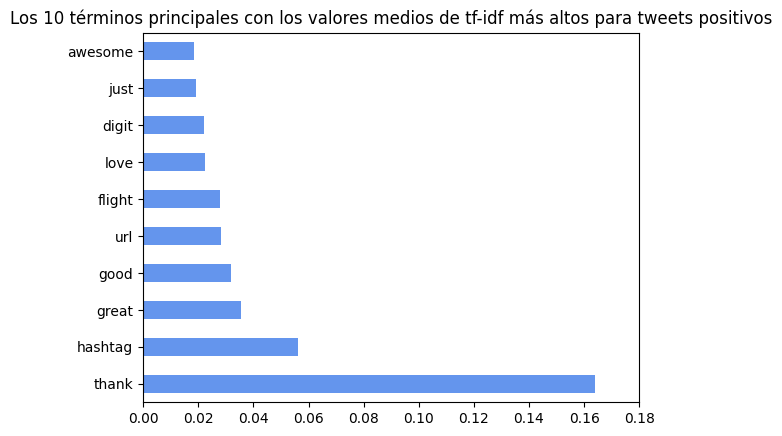

In [58]:
pos.plot(kind='barh', 
         xlim=(0, 0.18),
         color='cornflowerblue',
         title='Los 10 términos principales con los valores medios de tf-idf más altos para tweets positivos');

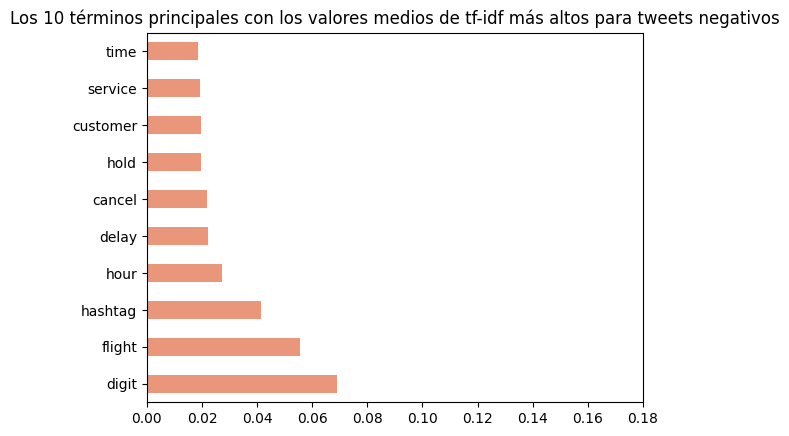

In [59]:
neg.plot(kind='barh', 
         xlim=(0, 0.18),
         color='darksalmon',
         title='Los 10 términos principales con los valores medios de tf-idf más altos para tweets negativos');

🎬 **Demo: Clasificación de Sentimientos Usando la Representación TF-IDF**

¡Ahora que tenemos una representación tf-idf del texto, estamos listos para hacer análisis de sentimientos!

En esta demostración, usaremos un modelo de **regresión logística** para realizar la tarea de clasificación. Aquí explicamos brevemente cómo funciona la regresión logística como uno de los métodos de **Aprendizaje Automático supervisado**, pero siéntete libre de explorar nuestro taller sobre **Fundamentos de Aprendizaje Automático en Python** si quieres aprender más al respecto.

Los **coeficientes** nos dicen si una característica contribuye positiva o negativamente al valor predicho. El valor predicho corresponde a la suma de todas las características (multiplicadas por sus coeficientes), y el valor predicho se pasa a una **función sigmoide** para ser convertido en el espacio de probabilidad, lo que nos dice si la etiqueta predicha es positiva.

La porción restante de los datos, conocida como el **conjunto de prueba**, se usa para verificar si los coeficientes aprendidos pueden generalizarse a datos no vistos.

Ahora que ya tenemos el dataframe tf-idf, el conjunto de características está listo. ¡Vamos a sumergirnos en la especificación del modelo!

In [60]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

Usaremos la función train_test_split de sklearn para separar nuestros datos en dos conjuntos:

In [61]:
# División de entrenamiento y prueba
X = tfidf
y = tweets['airline_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

La función fit_logistic_regression se escribe a continuación para agilizar el proceso de entrenamiento.

In [62]:
def fit_logistic_regression(X, y):
    '''Ajusta un modelo de regresión logística a los datos proporcionados.'''
    model = LogisticRegressionCV(Cs=10,
                                 penalty='l1',
                                 cv=5,
                                 solver='liblinear',
                                 class_weight='balanced',
                                 random_state=42,
                                 refit=True).fit(X, y)
    return model

Ajustaremos el modelo y calcularemos la precisión en el entrenamiento y la prueba.

In [63]:
# Ajustar el modelo de regresión logística
model = fit_logistic_regression(X_train, y_train)

In [64]:
# Obtener la precisión en el entrenamiento y la prueba
print(f"Precisión en el entrenamiento: {model.score(X_train, y_train)}")
print(f"Precisión en la prueba: {model.score(X_test, y_test)}")

Precisión en el entrenamiento: 0.944744622285656
Precisión en la prueba: 0.8978060046189377


El modelo logró una precisión de ~94% en el conjunto de entrenamiento y ~89% en el conjunto de prueba—¡eso es bastante bueno! El modelo se generaliza razonablemente bien a los datos de prueba.

A continuación, también echemos un vistazo a los coeficientes ajustados para ver si lo que vemos tiene sentido.

Podemos acceder a ellos usando coef_, y podemos emparejar cada coeficiente con los tokens del vectorizador:

In [65]:
# Obtener los coeficientes de todas las características
coefs = model.coef_.ravel()

# Obtener todos los tokens
tokens = vectorizer.get_feature_names_out()

# Crear un dataframe de token-coeficiente
importance = pd.DataFrame()
importance['token'] = tokens
importance['coefs'] = coefs

In [66]:
# Obtener los 10 tokens principales con los coeficientes más bajos
neg_coef = importance.sort_values('coefs').head(10)
neg_coef

,token,coefs
2761,rude,-11.713298
2822,screw,-10.138695
2764,ruin,-9.261884
1554,hour,-8.525914
1915,luggage,-8.090784
2065,money,-7.999356
266,bad,-7.891403
2316,pay,-7.610691
3072,strand,-6.728691
1562,hrs,-6.470224


In [67]:
# Obtener los 10 tokens principales con los coeficientes más altos
pos_coef = importance.sort_values('coefs').tail(10)
pos_coef

,token,coefs
1136,exceptional,7.710212
1134,excellent,7.732624
1904,love,8.108254
3201,thankful,8.185896
116,amazing,8.313744
1422,great,8.554572
3536,wonderful,9.021020
252,awesome,9.996762
1792,kudo,10.853861
3200,thank,16.673877


Vamos a graficar los 10 tokens principales con los coeficientes más altos y más bajos.

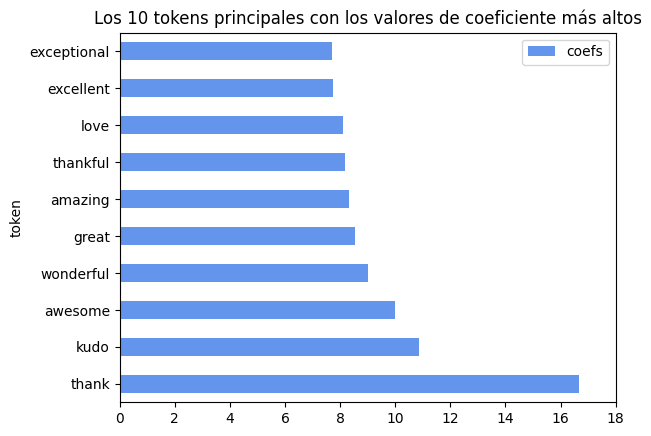

In [68]:
# Graficar los 10 tokens principales que tienen los coeficientes más altos
pos_coef.sort_values('coefs', ascending=False) \
        .plot(kind='barh', 
              xlim=(0, 18),
              x='token',
              color='cornflowerblue',
              title='Los 10 tokens principales con los valores de coeficiente más altos');

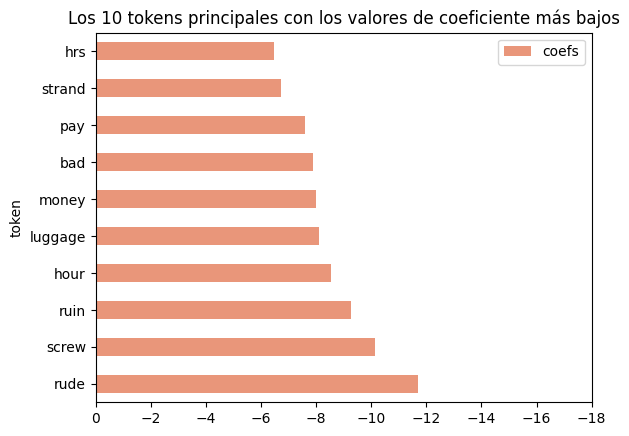

In [69]:
# Graficar los 10 tokens principales que tienen los coeficientes más bajos
neg_coef.plot(kind='barh', 
              xlim=(0, -18),
              x='token',
              color='darksalmon',
              title='Los 10 tokens principales con los valores de coeficiente más bajos');

Palabras como **"ruin," "rude," y "hour"** son fuertes indicadores de sentimiento negativo, mientras que **"thank," "awesome," y "wonderful"** están asociadas con sentimiento positivo.

Terminaremos la Parte 2 con estos gráficos. Estos términos de coeficientes y las palabras con los valores más altos de **TF-IDF** proporcionan diferentes perspectivas sobre el sentimiento de los tweets. Si lo deseas, tómate un tiempo para comparar los dos conjuntos de gráficos y ver cuál proporciona una mejor explicación de los sentimientos expresados en los tweets.